In [16]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [17]:
train_data = np.array(list(np.loadtxt("train3.csv", delimiter=","))).astype("float32")
train_labels = np.array(list(np.loadtxt("train_label1.csv", delimiter=","))).astype("float32")
eval_data = np.array(list(np.loadtxt("eval3.csv", delimiter=","))).astype("float32")
eval_labels = np.array(list(np.loadtxt("eval_label1.csv", delimiter=","))).astype("float32")

In [18]:
x_train = train_data.reshape(-1, 24*24*3)
x_val = eval_data.reshape(-1, 24*24*3)

y_train=np.abs(np.reshape(train_labels,(-1,1)))
y_val=np.abs(np.reshape(eval_labels,(-1,1)))
y_max=max(np.max(y_train),np.max(y_val))  #maximum observed chirality

y_train=y_train/y_max  #notice the change
y_val=y_val/y_max

print(max(y_train),max(y_val))

[1.] [0.9997983]


In [19]:
model = Sequential()
'''
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (24, 24, 2)))

#model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten(input_shape=(24,24,2)))'''
model.add(Dense(512, activation='linear', input_dim=1728))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='mean_squared_error', optimizer = Adam(lr=1e-4))#, metrics=["accuracy"]) #binary_crossentropy

In [21]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [22]:
hist = model.fit(x=x_train, y=y_train, batch_size=512,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val, y_val), #For speed
                           callbacks=[annealer])

Train on 64000 samples, validate on 16000 samples
Epoch 1/20
 - 4s - loss: 0.0064 - val_loss: 0.0013
Epoch 2/20
 - 2s - loss: 0.0015 - val_loss: 0.0017
Epoch 3/20
 - 2s - loss: 0.0010 - val_loss: 0.0017
Epoch 4/20
 - 2s - loss: 8.3103e-04 - val_loss: 0.0020
Epoch 5/20
 - 2s - loss: 7.3316e-04 - val_loss: 0.0020
Epoch 6/20
 - 2s - loss: 6.5752e-04 - val_loss: 0.0020
Epoch 7/20
 - 2s - loss: 6.0870e-04 - val_loss: 0.0017
Epoch 8/20
 - 2s - loss: 5.6717e-04 - val_loss: 0.0019
Epoch 9/20
 - 2s - loss: 5.3124e-04 - val_loss: 0.0020
Epoch 10/20
 - 2s - loss: 5.1017e-04 - val_loss: 0.0021
Epoch 11/20
 - 2s - loss: 4.9016e-04 - val_loss: 0.0021
Epoch 12/20
 - 2s - loss: 4.7670e-04 - val_loss: 0.0019
Epoch 13/20
 - 2s - loss: 4.5786e-04 - val_loss: 0.0022
Epoch 14/20
 - 2s - loss: 4.4187e-04 - val_loss: 0.0021
Epoch 15/20
 - 2s - loss: 4.3467e-04 - val_loss: 0.0020
Epoch 16/20
 - 2s - loss: 4.2707e-04 - val_loss: 0.0019
Epoch 17/20
 - 2s - loss: 4.1314e-04 - val_loss: 0.0021
Epoch 18/20
 - 2s -

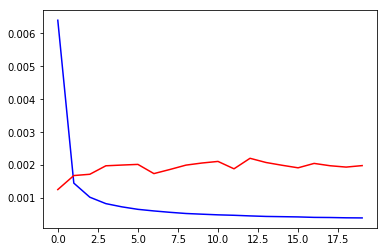

In [23]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()

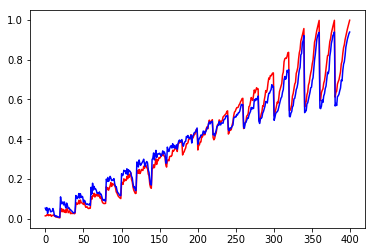

(16000, 1)


In [24]:
y_hat = model.predict(x_val)
h_val=[]
h_hat=[]
for i in range(400):
    h_val.append(np.mean(y_val[i*40:(i+1)*40]))
    h_hat.append(np.mean(y_hat[i*40:(i+1)*40]))
plt.plot(h_val,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

In [25]:
test_data = np.array(list(np.loadtxt("test.csv", delimiter=","))).astype("float32")

In [26]:
test_labels = np.array(list(np.loadtxt("test_label1.csv", delimiter=","))).astype("float32")

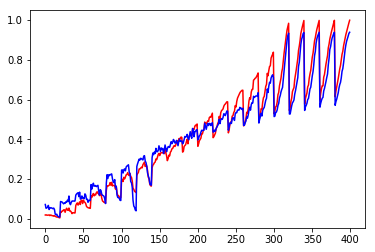

(40000, 1)


In [27]:
x_test = test_data.reshape(-1, 24*24*3)
y_test=np.abs(np.reshape(test_labels,(-1,1)))

y_test=y_test/y_max

y_hat = model.predict(x_test)
h_test=[]
h_hat=[]
for i in range(400):
    h_test.append(np.mean(y_test[i*100:(i+1)*100]))
    h_hat.append(np.mean(y_hat[i*100:(i+1)*100]))
plt.plot(h_test,'r')
plt.plot(h_hat,'b')
plt.show()
print(np.shape(y_hat))

In [28]:
final_loss = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}".format(final_loss))

Final loss: 0.0020


In [ ]:
final_loss = model.evaluate(x_test[:,:], y_test[:40000], verbose=0)
print("Final loss: {0:.4f}".format(final_loss))

In [30]:
print(np.shape(x_test),np.shape(y_test))

(40000, 1728) (80000, 1)
